In [1]:
%matplotlib inline

In [2]:
import os
from urllib.request import urlretrieve

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_date(filename='Fremont.csv', url=URL, forse_download=False):
    if forse_download or not os.path.exists(filename):
        urlretrieve(URL, 'Fremont.csv')
    data = pd.read_csv('Fremont.csv', index_col="Date")
    try:
        data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
    except TypeError:
        data.index = pd.to_datetime(data.index)
        
    data.columns = ['West', 'East']
    data['Total'] = data['East'] + data['West']

    return data
    

In [3]:
data = get_fremont_date()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


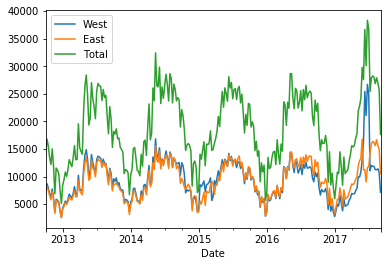

In [4]:
data.resample('W').sum().plot()

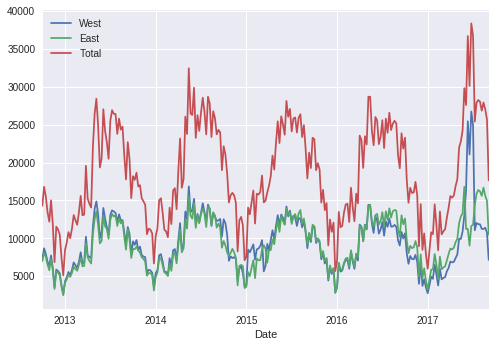

In [5]:
plt.style.use('seaborn')

data.resample('W').sum().plot()

(0, 1059460.05)

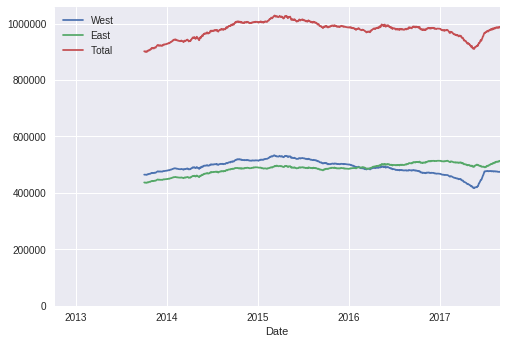

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

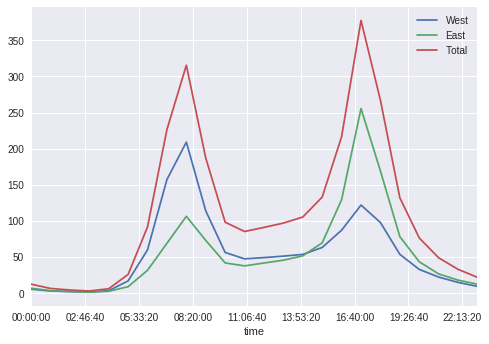

In [7]:
data.groupby(data.index.time).mean().plot()

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


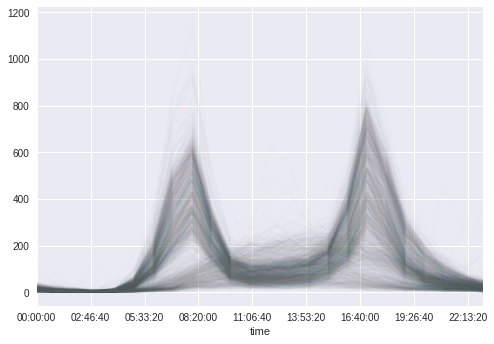

In [9]:
pivoted.plot(legend=False, alpha=0.01)


In [10]:
np.unique(data.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)], dtype=object)